In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class KDTree:

    def __init__(self, location: float, left_subtree, right_subtree):
        self.location = location
        self.left_subtree = left_subtree
        self.right_subtree = right_subtree

    def __repr__(self):
        return f"<kd-tree location={self.location:.2f}>"


def build_kd_tree(points, layer: int = 0) -> KDTree | None:
    if len(points) == 0:
        return

    k = len(points[0])
    axis = layer % k

    if len(points) == 1:
        return KDTree(points[0, axis], None, None)

    median: np.float64 = np.median(points[:, axis])
    left_points = points[points[:, axis] <= median]
    right_points = points[points[:, axis] > median]

    left_subtree = build_kd_tree(left_points, layer + 1)
    right_subtree = build_kd_tree(right_points, layer + 1)

    return KDTree(median, left_subtree, right_subtree)


In [3]:
np.random.seed(123)
points = np.random.normal(size=(1000, 2))

In [4]:
tree = build_kd_tree(points)
print(tree)

<kd-tree location=-0.01>


In [5]:
line_params = (lambda **kw: kw)(color='k', linewidth=1)

def generate_lines(tree, xmin=0, xmax=1, ymin=0, ymax=1, depth=0):
    if tree is None:
        return

    alpha = max([0.1, 1.0 - depth * 0.1])

    line_mode = 'v' if depth % 2 == 0 else 'h'
    
    xdata = [tree.location, tree.location] if line_mode == 'v' else [xmin, xmax]
    ydata = [tree.location, tree.location] if line_mode == 'h' else [ymin, ymax]
    lines = [Line2D(xdata, ydata, **line_params, alpha=alpha)]

    # left subtree
    xbounds = (xmin, tree.location) if line_mode == 'v' else (xmin, xmax)
    ybounds = (ymin, tree.location) if line_mode == 'h' else (ymin, ymax)
    left_lines = generate_lines(tree.left_subtree, *xbounds, *ybounds, depth=depth+1)
    if left_lines:
        lines += left_lines

    # right subtree
    xbounds = (tree.location, xmax) if line_mode == 'v' else (xmin, xmax)
    ybounds = (tree.location, ymax) if line_mode == 'h' else (ymin, ymax)
    right_lines = generate_lines(tree.right_subtree, *xbounds, *ybounds, depth=depth+1)
    if right_lines:
        lines += right_lines

    return lines

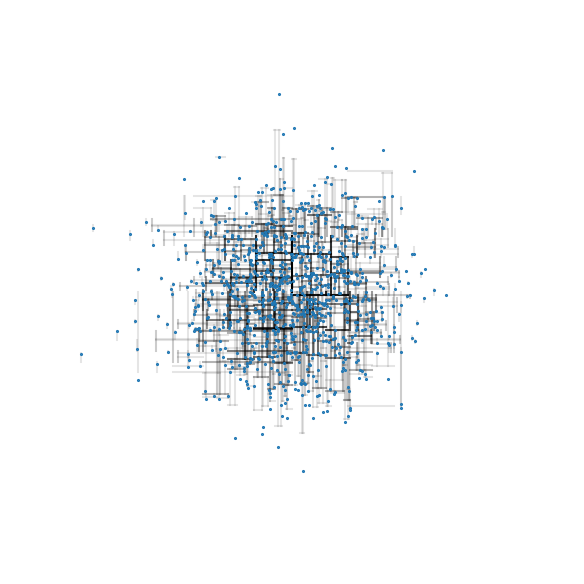

In [6]:
plt.figure(dpi=150)

lines = generate_lines(tree, depth=0)

for line in lines:
    plt.gca().add_line(line)

plt.plot(*points.T, '.', markersize=1)

plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
plt.gca().set_aspect(1)
plt.axis('off')
plt.show()

In [7]:
from scipy.spatial import KDTree

In [8]:
tree2 = KDTree(points)

In [28]:
r = 2.5
idxs = tree2.query_ball_point([r/2**0.5, r/2**0.5], r=r)

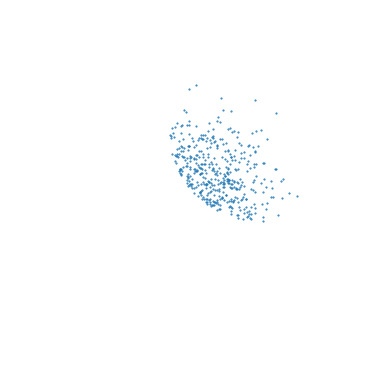

In [29]:
plt.figure()

plt.plot(*points[idxs].T, '.', markersize=1)

plt.xlim(-5.0, 5.0)
plt.ylim(-5.0, 5.0)
plt.gca().set_aspect(1)
plt.axis('off')
plt.show()
plt.show()